# 📌 Extracão


In [172]:
import pandas as pd

In [173]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'

df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [174]:
df_cust = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_int = pd.json_normalize(df['internet'])
df_acc = pd.json_normalize(df['account'])

In [175]:
df = pd.concat([df, df_cust, df_phone, df_int, df_acc], axis=1)
df = df.drop(columns=['customer', 'phone', 'internet', 'account'])
df.head(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


# 🔧 Transformação

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


object -> texto

int64 -> numero inteiro

float -> numero decimal

dados importantes para analisar a evasão: Churn, tenure, Contract, PaymentMethod, Charges.Monthly, Charges.Total, InternetService, OnlineSecurity, OnlineBackup, SeniorCitizen, Dependents, InternetService

### Verificando Inconsistências

In [177]:
df.isnull().sum() #nao ha valores nulos

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [178]:
df.duplicated().sum() #nao ha valores duplicados

np.int64(0)

In [179]:
df['customerID'].duplicated().sum() #nao ha id duplicado

np.int64(0)

In [180]:
veridicar_col = ['Churn', 'SeniorCitizen', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

for col in veridicar_col:
  print(f"{col}\t -> \t{df[col].unique().tolist()}")

Churn	 -> 	['No', 'Yes', '']
SeniorCitizen	 -> 	[0, 1]
Dependents	 -> 	['Yes', 'No']
PhoneService	 -> 	['Yes', 'No']
MultipleLines	 -> 	['No', 'Yes', 'No phone service']
InternetService	 -> 	['DSL', 'Fiber optic', 'No']
OnlineSecurity	 -> 	['No', 'Yes', 'No internet service']
OnlineBackup	 -> 	['Yes', 'No', 'No internet service']
DeviceProtection	 -> 	['No', 'Yes', 'No internet service']
TechSupport	 -> 	['Yes', 'No', 'No internet service']
StreamingTV	 -> 	['Yes', 'No', 'No internet service']
StreamingMovies	 -> 	['No', 'Yes', 'No internet service']
Contract	 -> 	['One year', 'Month-to-month', 'Two year']
PaperlessBilling	 -> 	['Yes', 'No']
PaymentMethod	 -> 	['Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)']


In [181]:
churn_vazio = df[df['Churn'] == '']
len(churn_vazio) #224 clientes com churn vazio

224

In [182]:
df.shape #uma pequena porcentagem tem o churn vazio

(7267, 21)

### Tratando as inconsistências

In [183]:
df['Churn'] = df['Churn'].replace('', 'Unknown')
df['Churn'].unique() # categoria especial para os que tem '' no churn

array(['No', 'Yes', 'Unknown'], dtype=object)

In [184]:
df['Charges.Total'] = df['Charges.Total'].replace(['', ' '], 0)
df['Charges.Total'] = df['Charges.Total'].astype(float)

### Coluna de Contas Diárias

In [185]:
df['Contas_Diarias'] = round(df['Charges.Monthly'] / 30, 2)

### Padronização e Transformação de Dados

In [186]:
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

In [187]:
val_binarios = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for i in val_binarios:
  df[i] = df[i].map({'Yes': 1, 'No': 0})

In [188]:
df['InternetService_numeric'] = df['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})

In [189]:
df['Churn_numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [190]:
services_col = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in services_col:
  df[i] = df[i].map({'Yes': 1, 'No': 0, 'No internet service': 0}) #'No internet service' foi considerado como 'No'

In [191]:
for col in df.columns:
  print(f"{col}\t -> \t{df[col].unique().tolist()}")

customerID	 -> 	['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', '0011-IGKFF', '0013-EXCHZ', '0013-MHZWF', '0013-SMEOE', '0014-BMAQU', '0015-UOCOJ', '0016-QLJIS', '0017-DINOC', '0017-IUDMW', '0018-NYROU', '0019-EFAEP', '0019-GFNTW', '0020-INWCK', '0020-JDNXP', '0021-IKXGC', '0022-TCJCI', '0023-HGHWL', '0023-UYUPN', '0023-XUOPT', '0027-KWYKW', '0030-FNXPP', '0031-PVLZI', '0032-PGELS', '0036-IHMOT', '0040-HALCW', '0042-JVWOJ', '0042-RLHYP', '0047-ZHDTW', '0048-LUMLS', '0048-PIHNL', '0052-DCKON', '0052-YNYOT', '0056-EPFBG', '0057-QBUQH', '0058-EVZWM', '0060-FUALY', '0064-SUDOG', '0064-YIJGF', '0067-DKWBL', '0068-FIGTF', '0071-NDAFP', '0074-HDKDG', '0076-LVEPS', '0078-XZMHT', '0080-EMYVY', '0080-OROZO', '0082-LDZUE', '0082-OQIQY', '0083-PIVIK', '0089-IIQKO', '0093-EXYQL', '0093-XWZFY', '0094-OIFMO', '0096-BXERS', '0096-FCPUF', '0098-BOWSO', '0100-DUVFC', '0103-CSITQ', '0104-PPXDV', '0106-GHRQR', '0106-UGRDO', '0107-WESLM', '0107-YHINA', '0111-KLBQG', '0112-QAWRZ', '0112-QWPNC', '0114-IGABW', '01

# 📊 Carga e Análise

### Análise Descritiva

In [192]:
tenure_ana = {
    'mean': round(df['tenure'].mean(), 2),
    'median': round(df['tenure'].median(), 2),
    'desvio padrao': round(df['tenure'].std(), 2),
    'min': df['tenure'].min(),
    'max': df['tenure'].max()
}

tenure_ana

{'mean': np.float64(32.35),
 'median': 29.0,
 'desvio padrao': 24.57,
 'min': 0,
 'max': 72}

In [193]:
charges_mon_ana = {
    'mean': round(df['Charges.Monthly'].mean(), 2),
    'median': round(df['Charges.Monthly'].median(), 2),
    'desvio padrao': round(df['Charges.Monthly'].std(), 2),
    'min': df['Charges.Monthly'].min(),
    'max': df['Charges.Monthly'].max()
}

charges_mon_ana

{'mean': np.float64(64.72),
 'median': 70.3,
 'desvio padrao': 30.13,
 'min': 18.25,
 'max': 118.75}

In [194]:
charges_tot_ana = {
    'mean': round(df['Charges.Total'].mean(), 2),
    'median': round(df['Charges.Total'].median(), 2),
    'desvio padrao': round(df['Charges.Total'].std(), 2),
    'min': df['Charges.Total'].min(),
    'max': df['Charges.Total'].max()
}

charges_tot_ana

{'mean': np.float64(2277.18),
 'median': 1389.2,
 'desvio padrao': 2268.65,
 'min': 0.0,
 'max': 8684.8}

In [195]:
var_categorica_ana ={
    'Churn': df['Churn'].value_counts().to_dict(),
    'Contract': df['Contract'].value_counts().to_dict(),
    'PaymentMethod': df['PaymentMethod'].value_counts().to_dict(),
    'InternetService': df['InternetService'].value_counts().to_dict()
}

var_categorica_ana

{'Churn': {'No': 5174, 'Yes': 1869, 'Unknown': 224},
 'Contract': {'Month-to-month': 4005, 'Two year': 1743, 'One year': 1519},
 'PaymentMethod': {'Electronic check': 2445,
  'Mailed check': 1665,
  'Bank transfer (automatic)': 1589,
  'Credit card (automatic)': 1568},
 'InternetService': {'Fiber optic': 3198, 'DSL': 2488, 'No': 1581}}

### Distribuição da Evasão

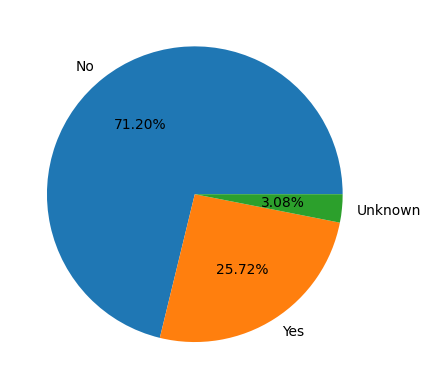

In [196]:
import matplotlib.pyplot as plt

plt.pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts().index, autopct='%1.2f%%')
plt.show()

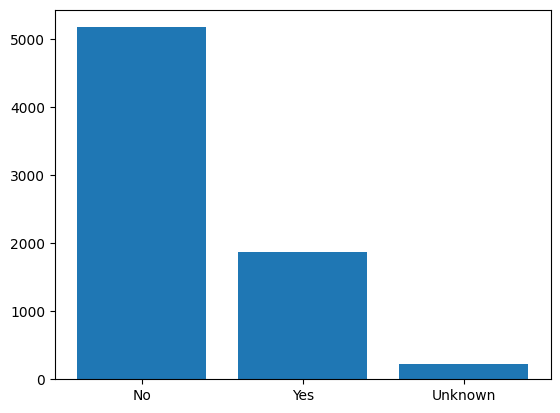

In [197]:
plt.bar(df['Churn'].value_counts().index, df['Churn'].value_counts())
plt.show()

### Contagem de Evasão por Variáveis Categóricas

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

def geraGrafico(col, titulo, xlab):
  sns.countplot(data=df, x=col, hue='Churn')
  plt.title(titulo)
  plt.xlabel(xlab)
  plt.ylabel('Número de Clientes')
  plt.legend(title='Churn', labels=['Não', 'Sim', 'Desconhecido'])

In [199]:
def geraTabela(col):
  tabela = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
  print(tabela)

Gênero 0: 26.1% de evasão
Gênero 1: 25.3% de evasão


/tmp/ipython-input-2778048999.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Gênero {i}: {churn_por_genero[1] * 100:.1f}% de evasão")
/tmp/ipython-input-2778048999.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Gênero {i}: {churn_por_genero[1] * 100:.1f}% de evasão")


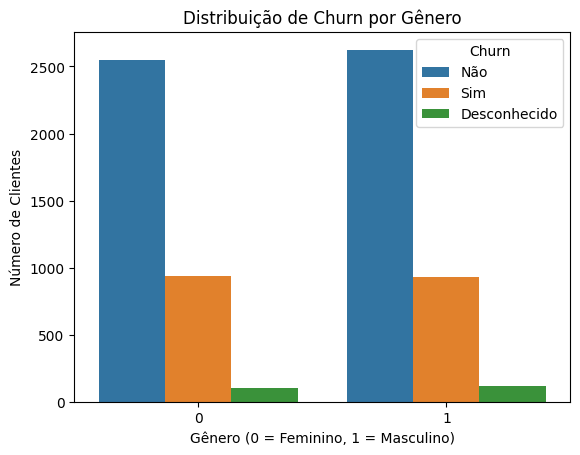

In [200]:
geraGrafico('gender', 'Distribuição de Churn por Gênero', 'Gênero (0 = Feminino, 1 = Masculino)')

total_por_genero = df['gender'].value_counts()
for i in [0, 1]:
    churn_por_genero = df[df['gender'] == i]['Churn'].value_counts(normalize=True)
    print(f"Gênero {i}: {churn_por_genero[1] * 100:.1f}% de evasão")

Churn                  No   Unknown        Yes
Contract                                      
Month-to-month  55.430712  3.245943  41.323346
One year        86.043450  3.028308  10.928242
Two year        94.492255  2.753873   2.753873


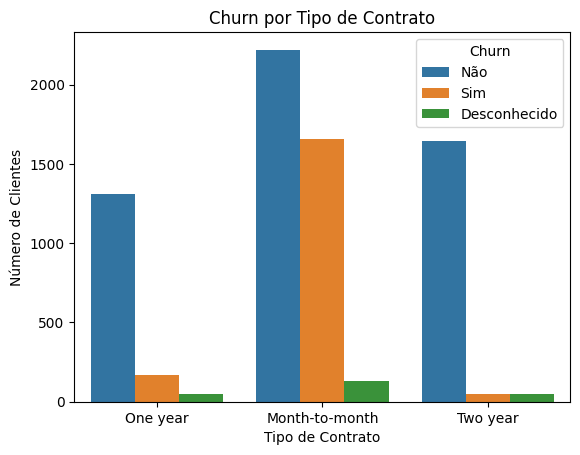

In [201]:
geraGrafico('Contract', 'Churn por Tipo de Contrato', 'Tipo de Contrato')
geraTabela('Contract')

Churn                             No   Unknown        Yes
PaymentMethod                                            
Bank transfer (automatic)  80.931403  2.831970  16.236627
Credit card (automatic)    82.270408  2.933673  14.795918
Electronic check           52.924335  3.271984  43.803681
Mailed check               78.318318  3.183183  18.498498


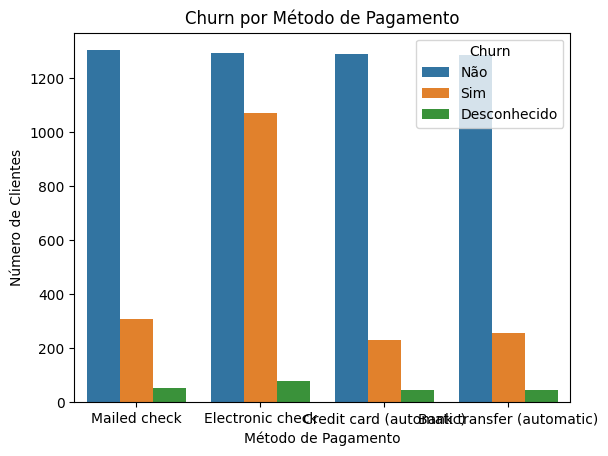

In [202]:
geraGrafico('PaymentMethod', 'Churn por Método de Pagamento', 'Método de Pagamento')
geraTabela('PaymentMethod')

Churn                   No   Unknown        Yes
InternetService                                
DSL              78.858521  2.692926  18.448553
Fiber optic      56.253909  3.189493  40.556598
No               89.373814  3.478811   7.147375


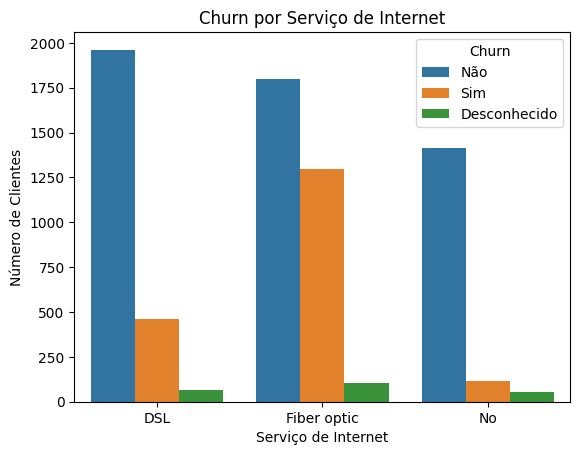

In [203]:
geraGrafico('InternetService', 'Churn por Serviço de Internet', 'Serviço de Internet')
geraTabela('InternetService')

Churn              No   Unknown        Yes
Dependents                                
0           66.653559  3.008258  30.338183
1           81.797341  3.255387  14.947272


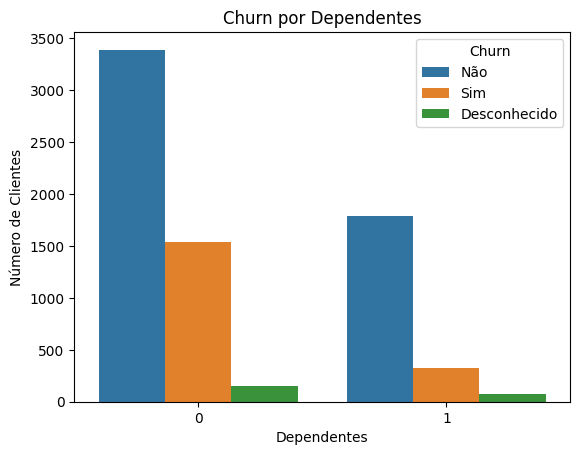

In [204]:
geraGrafico('Dependents', 'Churn por Dependentes', 'Dependentes')
geraTabela('Dependents')

Churn                 No   Unknown        Yes
SeniorCitizen                                
0              74.083813  3.023829  22.892358
1              56.345178  3.384095  40.270728


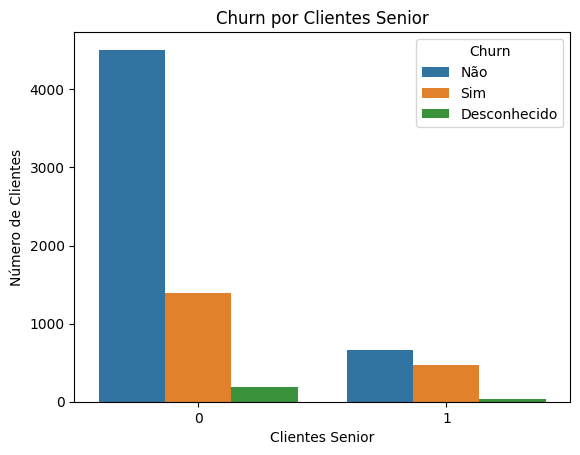

In [205]:
geraGrafico('SeniorCitizen', 'Churn por Clientes Senior', 'Clientes Senior')
geraTabela('SeniorCitizen')

Churn               No   Unknown        Yes
TechSupport                                
0            66.627929  3.176448  30.195623
1            82.414449  2.851711  14.733840


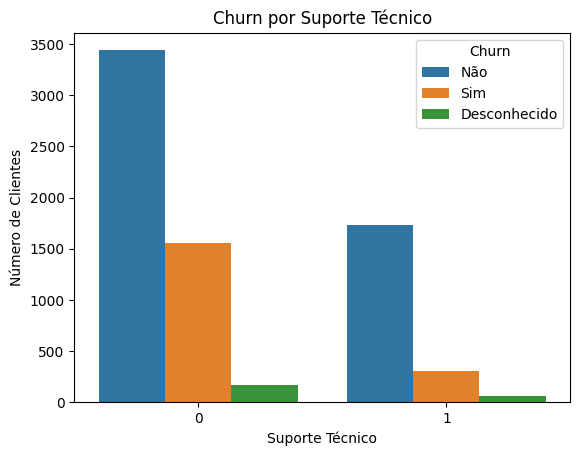

In [206]:
geraGrafico('TechSupport', 'Churn por Suporte Técnico', 'Suporte Técnico')
geraTabela('TechSupport')

### Contagem de Evasão por Variáveis Numéricas

In [207]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias,InternetService_numeric,Churn_numeric
0,0002-ORFBO,No,0,0,1,1,9,1,No,DSL,...,1,0,One year,1,Mailed check,65.6,593.30,2.19,1,0.0
1,0003-MKNFE,No,1,0,0,0,9,1,Yes,DSL,...,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00,1,0.0
2,0004-TLHLJ,Yes,1,0,0,0,4,1,No,Fiber optic,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46,2,1.0
3,0011-IGKFF,Yes,1,1,1,0,13,1,No,Fiber optic,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27,2,1.0
4,0013-EXCHZ,Yes,0,1,1,0,3,1,No,Fiber optic,...,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80,2,1.0


In [208]:
print(df.groupby('Churn')[['tenure', 'Charges.Total', 'Charges.Monthly', 'Contas_Diarias']].describe())

         tenure                                                     \
          count       mean        std  min   25%   50%   75%   max   
Churn                                                                
No       5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0   
Unknown   224.0  31.571429  24.998552  1.0   7.0  29.0  56.0  72.0   
Yes      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

        Charges.Total               ... Charges.Monthly          \
                count         mean  ...             75%     max   
Churn                               ...                           
No             5174.0  2549.911442  ...         88.4000  118.75   
Unknown         224.0  2196.933705  ...         90.4125  115.55   
Yes            1869.0  1531.796094  ...         94.2000  118.35   

        Contas_Diarias                                                        
                 count      mean       std   min    25%    50%     75%   max  
Churn             

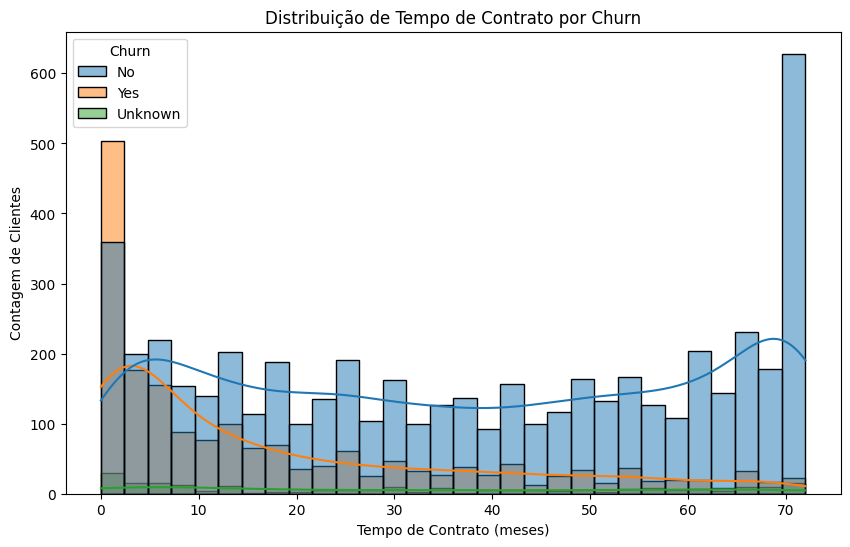

In [209]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30)
plt.title('Distribuição de Tempo de Contrato por Churn')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Contagem de Clientes')
plt.show()

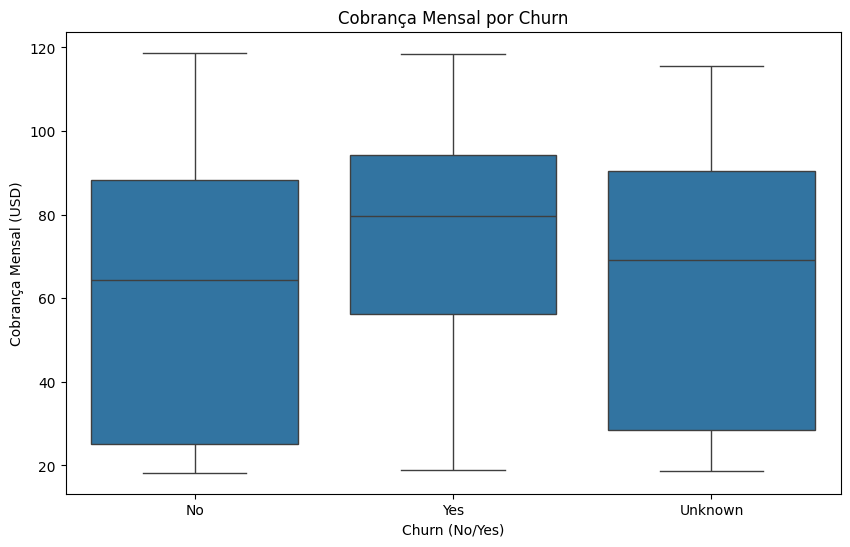

In [210]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='Charges.Monthly')
plt.title('Cobrança Mensal por Churn')
plt.xlabel('Churn (No/Yes)')
plt.ylabel('Cobrança Mensal (USD)')
plt.show()

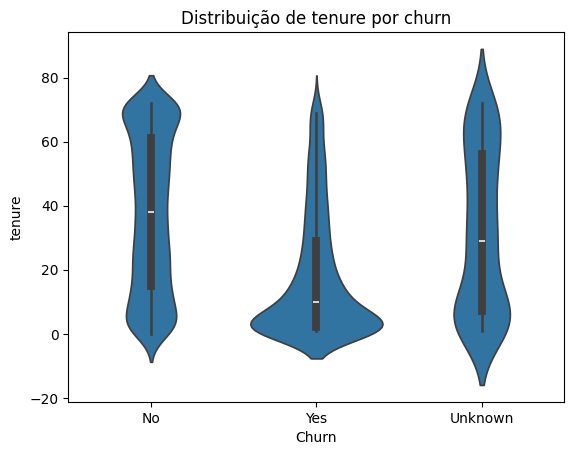

In [211]:
sns.violinplot(data=df, x='Churn', y='tenure')
plt.title('Distribuição de tenure por churn')
plt.show()

In [212]:
correlation = df[['Charges.Total', 'tenure', 'Charges.Monthly', 'Churn_numeric']].corr()
print(correlation['Churn_numeric'].sort_values(ascending=False))

Churn_numeric      1.000000
Charges.Monthly    0.193356
Charges.Total     -0.198324
tenure            -0.352229
Name: Churn_numeric, dtype: float64


In [213]:
df['TotalCharges_Group'] = pd.cut(df['Charges.Total'], bins=[0, 500, 1000, 2000, 5000],
                                 labels=['0-500', '500-1000', '1000-2000', '2000+'])
churn_by_charges = df.groupby('TotalCharges_Group')['Churn'].value_counts(normalize=True).unstack() * 100
print(churn_by_charges)

Churn                      No   Unknown        Yes
TotalCharges_Group                                
0-500               56.679574  3.194579  40.125847
500-1000            70.334412  3.667745  25.997843
1000-2000           76.528302  3.169811  20.301887
2000+               76.547416  2.271437  21.181147


/tmp/ipython-input-1040916762.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_charges = df.groupby('TotalCharges_Group')['Churn'].value_counts(normalize=True).unstack() * 100
